In [1]:
#Author: Heeirthan Shanthan Homework 6

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# get the data from https://archive.ics.uci.edu/dataset/186/wine+quality
df_red = pd.read_csv('C:/Users/heeir/Downloads/winequality-red.csv',sep = ';')
df_red['color'] = 1
df_white = pd.read_csv('C:/Users/heeir/Downloads/winequality-white.csv',sep = ';')
df_white['color'] = 0
df = pd.concat([df_red,df_white])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
#predicting target quality:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color']
target = ['quality']

In [5]:
#Training, validation, testing split
x_tr,x_te,y_tr,y_te = train_test_split(df[features],df[target],
                                       test_size = 0.2)
x_tr,x_va,y_tr,y_va = train_test_split(x_tr,y_tr,
                                       test_size = 0.5)

In [8]:
x_va

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
1141,9.3,0.34,0.49,7.3,0.052,30.0,146.0,0.99800,3.17,0.61,10.2,0
201,8.8,0.37,0.48,2.1,0.097,39.0,145.0,0.99750,3.04,1.03,9.3,1
3370,6.0,0.29,0.25,1.4,0.033,30.0,114.0,0.98794,3.08,0.43,13.2,0
3429,7.1,0.18,0.39,14.5,0.051,48.0,156.0,0.99947,3.35,0.78,9.1,0
657,7.3,0.34,0.21,3.2,0.050,14.0,136.0,0.99360,3.25,0.44,10.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,8.4,0.20,0.38,11.8,0.055,51.0,170.0,1.00040,3.34,0.82,8.9,0
3022,8.0,0.74,0.21,4.0,0.050,24.0,133.0,0.99418,3.06,0.38,9.7,0
699,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,1
4398,7.4,0.27,0.26,11.8,0.053,55.0,173.0,0.99699,3.11,0.60,9.8,0


In [11]:
# PCA and normalization
pca = PCA()
pca.fit(normalize(x_tr)) #train model on normalized data
x_tr_p = pca.transform(normalize(x_tr)) # new dataset x_tr_p with principal components
num_trees = 100 #100 estimators used.
fss = []
#print(pd.DataFrame(df_x_tr_p)) #proves that we have 12 columns, equal to our 12 features

for i in range(num_trees):
    
    #Here, we are using a random binary array to select random feature subsets for all trees,
    #In this loop, we are randomly creating the indices for random 
    array = [0]
    while sum(array)==0:
        array = np.random.randint(0,2,x_tr_p.shape[1]) #random binary array with size equal to length of cols
    rand_fs_indices = np.where(array)[0] #save indices where values in array equals 1
    fss.append(rand_fs_indices) #appending indices where we have our random features
    
trees = []
for i in range(num_trees):
    #print(fss[1])
    tr = DecisionTreeRegressor(random_state = np.random.randint(10**7)) #training each tree in r
    x_tr_subset = x_tr_p[:,fss[i]] #train each tree on a random subset of features based on the random indices
    #print(pd.DataFrame(x_tr_subset)) #this contains values what belong to the feature of the tree
    tr.fit(x_tr_subset,y_tr) 
    trees.append(tr) # add tree to forest

#The print statements above just verify that the feature values for the random columns match the values in each subset. 

#Using Dr.Briggs' function that returns the average score of the estimators
def forest_pred(forest,inputs,fss):
    inputs = pca.transform(normalize(inputs)) #I added this to make sure x_va is in the same dimension as the training data
    preds = []
    for tree,fs in zip(forest,fss):
        preds.append(tree.predict(inputs[:,fs]))
    avgs = sum(preds)/len(preds) # average the predictions
    return(avgs)

#Using Dr.Briggs' function that returns the R2 score
def score(preds,actual):
    '''
    accepts: preds: an iterable of predictions
             actual: the actual values
    returns: the R^2 score of the model which generated the predictions
    '''
    resid = actual - preds.reshape(-1,1)
    sse = np.sum(resid**2)
    resid_null = actual - np.mean(actual)
    sse_null = np.sum(resid_null**2)
    r2 = 1-sse/sse_null
    return(r2)

preds = forest_pred(trees,x_va,fss)
score(preds,y_va)


#The scores are generally in between 0.38 and 0.43, which is pretty close to the result we got 
#from only dropping features. Expected a better score as PCA and normalization helps reduce collinearity.

quality    0.387689
dtype: float64

In [7]:
#Part 2: In class on 10/30, we combined row bootstrapping with dropping random columns to make a random forest. 
#Try this again, varying the size of your bootstrap sample from 100 to 10000 (or larger if you see reason to do so). 
#Graph model accuracy vs size of bootstrap sample.

In [8]:
# dropping random features
num_trees = 100
fss = [] # a list to hold the list of feature subsets
def forest_pred(forest,inputs,fss):
    preds = []
    for tree,fs in zip(forest,fss):
        preds.append(tree.predict(inputs[fs]))
    avgs = sum(preds)/len(preds) # average the predictions
    return(avgs)

def score(preds,actual):
    '''
    accepts: preds: an iterable of predictions
             actual: the actual values
    returns: the R^2 score of the model which generated the predictions
    '''
    resid = actual - preds.reshape(-1,1)
    sse = np.sum(resid**2)
    resid_null = actual - np.mean(actual)
    sse_null = np.sum(resid_null**2)
    r2 = 1-sse/sse_null
    return(r2)

for i in range(num_trees):
    # we need a random binary array with not all 0s, I explained this process in part 1.
    array = np.random.randint(0,2,12)
    while sum(array)==0:
        array = np.random.randint(0,2,12)
    fs = np.array(features)[[bool(x) for x in np.random.randint(0,2,12)]]
    fss.append(df[fs].columns)


b_samples = []
b_scores = []
#setting the number of samples to range between 100 and 10000 in increments of 100.
no_samples = np.arange(100,10000,100)
for samples in no_samples:
    trees = []
    for i in range(num_trees):
        tr = DecisionTreeRegressor(random_state = np.random.randint(10**7))
        bootstrap_index = np.random.choice(x_tr.index, samples) #pick random row index from training data
        x_tr_subset = x_tr[fss[i]]
        tr.fit(x_tr_subset.loc[bootstrap_index,],y_tr.loc[bootstrap_index,]) #Here, we are training the model on randomized feature subset(method from part 1)
        #but now we are using the bootstrapped indexes for the rows. The number of random indices are 5000.
        trees.append(tr) #add tree to forest

    preds = forest_pred(trees,x_va,fss)
    b_scores.append(score(preds,y_va))

print(pd.DataFrame(b_scores))

     quality
0   0.292334
1   0.328183
2   0.339781
3   0.353114
4   0.355081
..       ...
94  0.421719
95  0.424456
96  0.427501
97  0.431143
98  0.430630

[99 rows x 1 columns]


Text(0.5, 1.0, 'Model Accuracy vs Size of Bootstrap Sample')

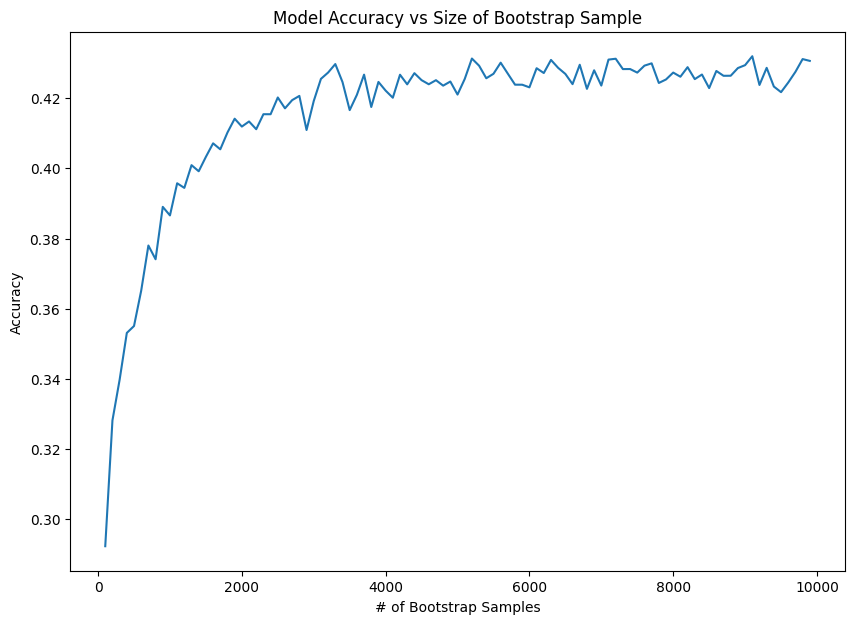

In [9]:
#Plotting accuracy of model vs size of bootstrap sample
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (10,7))
plt.plot(no_samples,b_scores)
plt.xlabel('# of Bootstrap Samples')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Size of Bootstrap Sample')

In [10]:
#As we can see, the model accuracy increases with the size of bootstrap sample.